In [2]:
from google.colab import files


uploaded = files.upload()


Saving owid-covid-data.csv to owid-covid-data.csv


In [3]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')

# Show the first few rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
# Show the column names
print("Column names:")
print(df.columns)

# Show summary of data
print("\nData Info:")
df.info()

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Column names:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smooth

In [5]:
# Keep only 3 countries for our analysis
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Drop rows with no 'new_cases' or 'new_deaths'
df_cleaned = df.dropna(subset=['new_cases', 'new_deaths'])

# Fill missing vaccination data with 0 for simplicity
df_cleaned['total_vaccinations'] = df_cleaned['total_vaccinations'].fillna(0)

df_cleaned.head()


<ipython-input-5-32a9b61ee04f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-5-32a9b61ee04f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['total_vaccinations'] = df_cleaned['total_vaccinations'].fillna(0)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139773,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139774,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139775,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139776,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139777,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


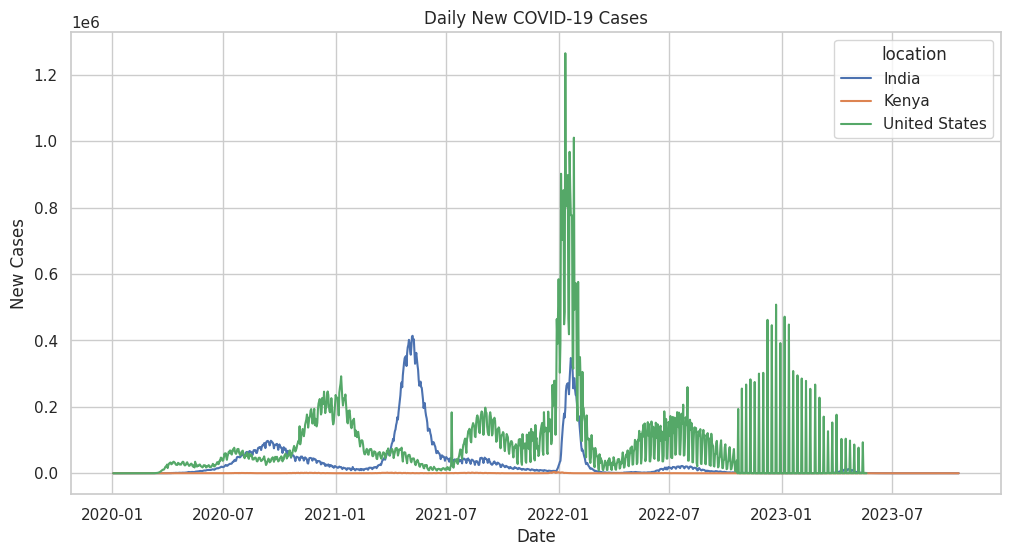

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()


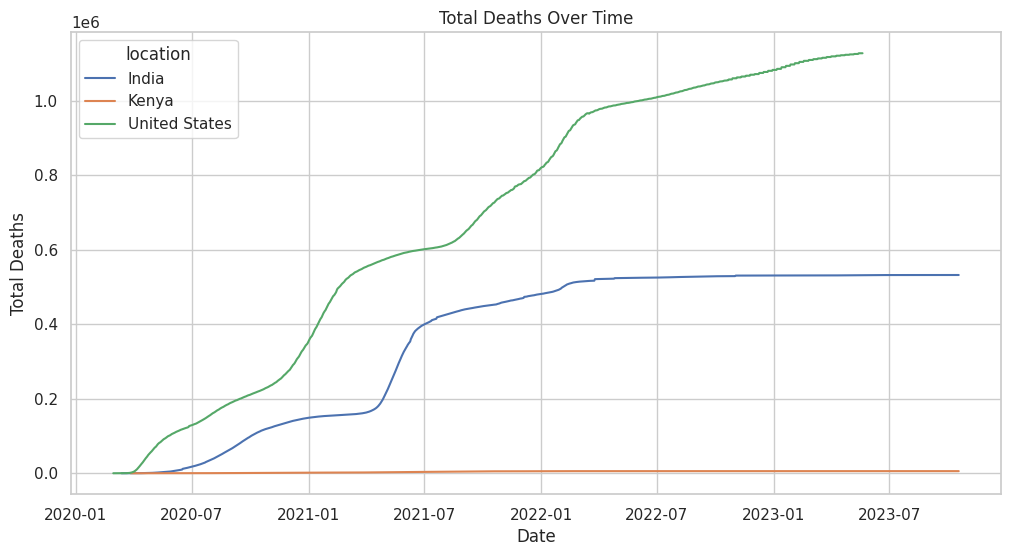

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='date', y='total_deaths', hue='location')
plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()


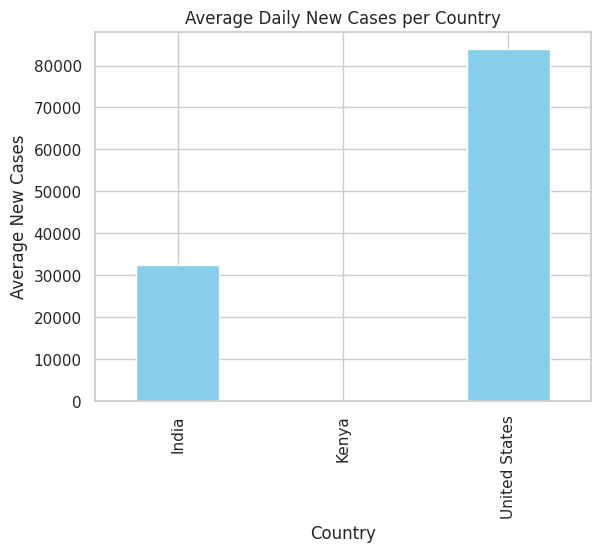

In [8]:
avg_new_cases = df_cleaned.groupby('location')['new_cases'].mean()

avg_new_cases.plot(kind='bar', color='skyblue')
plt.title('Average Daily New Cases per Country')
plt.ylabel('Average New Cases')
plt.xlabel('Country')
plt.show()


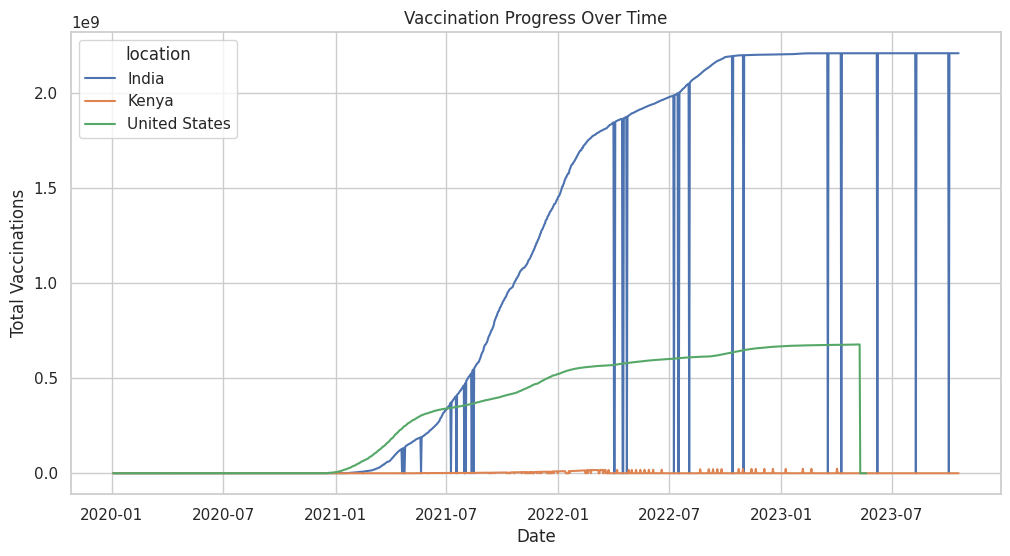

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='date', y='total_vaccinations', hue='location')
plt.title('Vaccination Progress Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.show()


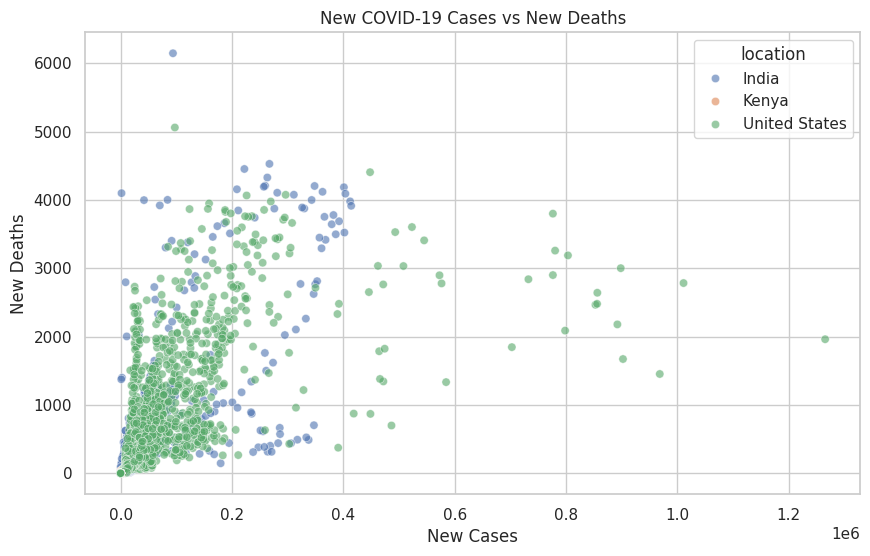

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='new_cases', y='new_deaths', data=df_cleaned, hue='location', alpha=0.6)
plt.title('New COVID-19 Cases vs New Deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.grid(True)
plt.show()


## Observations

1. The United States has the highest number of daily new cases on average.
2. Kenya shows fewer cases and deaths compared to India and the US.
3. Vaccination progress started later in Kenya compared to India and the US.
4. There is a strong relationship between the increase in new cases and an increase in new deaths.
5. The number of new deaths fluctuates more in India than in Kenya.
